### IMPORT LIBRARIES

In [1]:
from pathlib import Path 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_PATH = Path("data") 

In [3]:
df=pd.read_csv("credit_train.csv")

In [4]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Number of Records
print(f"Number of rows in the dataset:{df.shape[0]}")
print(f"Number of columns in the dataset:{df.shape[1]}")

Number of rows in the dataset:100514
Number of columns in the dataset:19


In [6]:
df.replace('na', np.nan, inplace = True) 
df.replace('null', np.nan, inplace = True) 
df.replace('NA', np.nan, inplace = True) 
df.replace('NULL', np.nan, inplace = True) 
df.replace('Null', np.nan, inplace = True)  
df.replace('NaN', np.nan, inplace = True) 

In [7]:
# Replace specific values (e.g., 999) with NaN
df.replace(99999999.0, np.nan, inplace=True)

# Perform mean imputation
df = df.fillna(df.mean())

In [8]:
new_df_filter = df.dropna(axis = 'index', how = 'any')
new_df_filter

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.000000,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.901321,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.000000,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,312313.597881,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.000000,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.901321,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.000000,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.901321,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.000000,Short Term,719.000000,7.833890e+05,1 year,Home Mortgage,Other,3727.61,17.4,18.000000,6.0,0.0,456.0,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.000000,Short Term,725.000000,4.754370e+05,7 years,Own Home,other,2202.86,22.3,34.901321,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,312313.597881,Short Term,732.000000,1.289416e+06,1 year,Rent,Debt Consolidation,13109.05,9.4,21.000000,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.000000,Short Term,742.000000,1.150545e+06,6 years,Rent,Debt Consolidation,7315.57,18.8,18.000000,12.0,1.0,109554.0,537548.0,1.0,0.0


In [9]:
new_df_filter.isnull()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
new_df_filter.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [11]:
new_df_filter.describe()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,95778.000000,95778.000000,9.577800e+04,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,9.577800e+04,9.577800e+04,95778.000000,95778.000000
mean,315210.032452,1072.819390,1.395093e+06,18702.935046,18.000383,34.859033,11.182610,0.162323,2.969464e+05,7.640170e+05,0.113053,0.028402
std,175582.275756,1318.769692,9.845163e+05,12231.407409,6.804039,15.062401,5.020218,0.474337,3.782820e+05,8.542785e+06,0.344316,0.254485
min,10802.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,183661.500000,711.000000,9.429748e+05,10442.210000,13.400000,34.000000,8.000000,0.000000,1.142470e+05,2.762540e+05,0.000000,0.000000
50%,312313.597881,733.000000,1.378277e+06,16434.620000,16.800000,34.901321,10.000000,0.000000,2.120685e+05,4.712840e+05,0.000000,0.000000
75%,405691.000000,750.000000,1.530531e+06,24254.592500,21.500000,34.901321,14.000000,0.000000,3.709560e+05,7.869840e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [12]:

new_df_filter['Loan Status'].value_counts()["Fully Paid"]

74411

In [13]:
new_df_filter['Loan Status'].value_counts()["Charged Off"]

21367

In [14]:
# Define a function to perform range normalization
def range_normalization(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply the range normalization function to all columns except the non-numeric ones
new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns] = new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns].apply(range_normalization)

new_df_filter


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,0.558303,Short Term,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,0.323112,Short Term,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,0.387324,Short Term,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,0.432738,Long Term,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,0.212497,Short Term,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,0.256641,Short Term,0.019350,0.004271,1 year,Home Mortgage,Other,0.008553,0.206278,0.102273,0.078947,0.000000,0.000014,0.000168,0.000000,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,0.175051,Short Term,0.020217,0.002410,7 years,Own Home,other,0.005054,0.279522,0.198303,0.065789,0.000000,0.001453,0.000428,0.000000,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,0.387324,Short Term,0.021227,0.007329,1 year,Rent,Debt Consolidation,0.030077,0.086697,0.119318,0.289474,0.000000,0.004655,0.000331,0.000000,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,0.118613,Short Term,0.022671,0.006490,6 years,Rent,Debt Consolidation,0.016785,0.227205,0.102273,0.157895,0.066667,0.003332,0.000349,0.142857,0.0


In [15]:
new_df_filter['Loan Status'].value_counts()["Fully Paid"]

74411

In [16]:
new_df_filter['Loan Status'].value_counts()["Charged Off"]

21367

In [17]:
new_df_filter.shape

(95778, 19)

In [18]:
# begin encoding
# get info about all the datatypes
new_df_filter.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [19]:
# drop the id columns
new_df_filter.drop(columns=['Loan ID'], inplace=True)
new_df_filter.drop(columns=['Customer ID'], inplace=True)

# Select the categorical columns
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# encode the categorical columns
new_df_filter = pd.get_dummies(new_df_filter, columns=cat_cols)
# Print the modified dataset
print(new_df_filter)

      Loan Status  Current Loan Amount  Credit Score  Annual Income  \
0      Fully Paid             0.558303      0.017906       0.006592   
1      Fully Paid             0.323112      0.070968       0.007866   
2      Fully Paid             0.387324      0.022527       0.013024   
3      Fully Paid             0.432738      0.019639       0.004413   
4      Fully Paid             0.212497      0.070968       0.007866   
...           ...                  ...           ...            ...   
99994  Fully Paid             0.256641      0.019350       0.004271   
99995  Fully Paid             0.175051      0.020217       0.002410   
99996  Fully Paid             0.387324      0.021227       0.007329   
99997  Fully Paid             0.118613      0.022671       0.006490   
99998  Fully Paid             0.667392      0.023249       0.009916   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
0          0.011965                 0.203288                      0.1

In [20]:
# separate x and y
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df_filter.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df_filter.columns.values]
target_column = "Loan Status"
y = new_df_filter[target_column]
X = new_df_filter.drop(target_column, axis=1)

In [21]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.558303,0.017906,0.006592,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,...,0,0,0,0,0,0,0,0,0,0
1,0.323112,0.070968,0.007866,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,...,0,0,0,0,0,0,0,0,0,0
2,0.387324,0.022527,0.013024,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,...,0,0,0,0,0,0,0,0,0,0
3,0.432738,0.019639,0.004413,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,...,0,0,0,0,0,0,0,0,0,0
4,0.212497,0.070968,0.007866,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.256641,0.019350,0.004271,0.008553,0.206278,0.102273,0.078947,0.000000,0.000014,0.000168,...,0,1,0,0,0,0,0,0,0,0
99995,0.175051,0.020217,0.002410,0.005054,0.279522,0.198303,0.065789,0.000000,0.001453,0.000428,...,0,0,0,0,0,1,0,0,0,0
99996,0.387324,0.021227,0.007329,0.030077,0.086697,0.119318,0.289474,0.000000,0.004655,0.000331,...,0,0,0,0,0,0,0,0,0,0
99997,0.118613,0.022671,0.006490,0.016785,0.227205,0.102273,0.157895,0.066667,0.003332,0.000349,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

0        Fully Paid
1        Fully Paid
2        Fully Paid
3        Fully Paid
4        Fully Paid
            ...    
99994    Fully Paid
99995    Fully Paid
99996    Fully Paid
99997    Fully Paid
99998    Fully Paid
Name: Loan Status, Length: 95778, dtype: object

In [23]:
# encode y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# begin oversampling according to target feature
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# Count the number of samples in each class
class_counts = np.bincount(y)

# Find the minority class with the lowest count
minority_class = np.argmin(class_counts)

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.558303,0.017906,0.006592,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,...,0,0,0,0,0,0,0,0,0,0
1,0.323112,0.070968,0.007866,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,...,0,0,0,0,0,0,0,0,0,0
2,0.387324,0.022527,0.013024,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,...,0,0,0,0,0,0,0,0,0,0
3,0.432738,0.019639,0.004413,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,...,0,0,0,0,0,0,0,0,0,0
4,0.212497,0.070968,0.007866,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148817,0.532774,0.939226,0.006767,0.035256,0.095500,0.198303,0.131786,0.000000,0.008062,0.000276,...,0,0,0,0,0,0,0,0,0,0
148818,0.567368,0.014839,0.012291,0.077616,0.140907,0.240560,0.111379,0.000000,0.058250,0.002503,...,0,0,0,0,0,0,0,0,0,0
148819,0.499861,0.981873,0.006827,0.046530,0.111072,0.198303,0.111142,0.000000,0.007756,0.000269,...,0,0,0,0,0,0,0,0,0,0
148820,0.294905,0.940072,0.006258,0.064677,0.135689,0.134724,0.136816,0.000000,0.008856,0.000274,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
new_df_filter['Loan Status'].value_counts()[0]

74411

In [27]:
new_df_filter['Loan Status'].value_counts()[1]

21367

In [28]:
# splitting
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and temporary sets (60% for training and 40% for temporary)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and testing sets (50% for each)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)


"""from sklearn.preprocessing import LabelEncoder
le_train = LabelEncoder()
y_train = le_train.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)
le_val = LabelEncoder()
y_val = le_val.fit_transform(y_val)"""


'from sklearn.preprocessing import LabelEncoder\nle_train = LabelEncoder()\ny_train = le_train.fit_transform(y_train)\nle_test = LabelEncoder()\ny_test = le_test.fit_transform(y_test)\nle_val = LabelEncoder()\ny_val = le_val.fit_transform(y_val)'

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

#xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=1, n_estimators=500, max_depth=4)
xgb_model = xgb.XGBClassifier()
# Train the classifier
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred)
print("XGB Accuracy", accuracy)


XGB Accuracy 0.871085875554361


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[11616  3285]
 [  412 14451]]


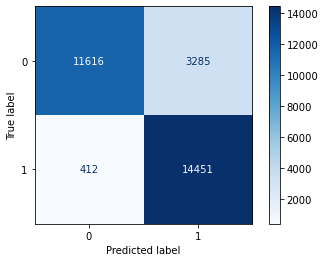

In [31]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
display.plot(cmap=plt.cm.Blues)

In [32]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss, recall_score
# calculate the precision of the model
precision = precision_score(y_val, y_pred, average='macro')
# calculate the F1 score of the model
f1 = f1_score(y_val, y_pred, average='macro')
# calculate the ROC curve and AUC of the model
y_prob = xgb_model.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_prob[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
# calculate the log loss of the model
logloss = log_loss(y_val, y_prob)
# Calculate the recall score
recall = recall_score(y_val, y_pred)
# Calculate the precision score
precision = precision_score(y_val, y_pred)

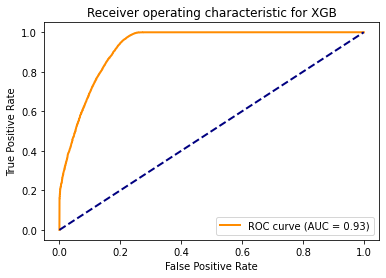

In [33]:
# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for XGB')
plt.legend(loc="lower right")
plt.show()

In [34]:
print("XGB F1 Score: ",f1)
print("XGB AUC: ",roc_auc)
print("XGB Log Loss: ", logloss)
print("XGB Recall:", recall)
print("XGB Precision: ", precision)

XGB F1 Score:  0.8746523367546339
XGB AUC:  0.9294834119772571
XGB Log Loss:  0.28689655327622415
XGB Recall: 0.9722801587835564
XGB Precision:  0.8147834912043301


In [35]:
from sklearn.metrics import classification_report
print("               XGB classification report")
print(classification_report(y_val, y_pred))

               XGB classification report
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     14901
           1       0.81      0.97      0.89     14863

    accuracy                           0.88     29764
   macro avg       0.89      0.88      0.87     29764
weighted avg       0.89      0.88      0.87     29764



In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 1], 
              'max_depth': [3, 5, 7], 
              'n_estimators': [100, 500, 1000]}

grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ )

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
Best Score: 0.8738870746646068


In [37]:
# xgb tunning
xgb_tunned = xgb.XGBClassifier(objective='binary:logistic',random_state=42, n_estimators=1000, max_depth=7,learning_rate=0.1,)
xgb_tunned.fit(X_train , y_train)
y_pred_tunned = xgb_tunned.predict(X_test)
accuracy_tunned = accuracy_score(y_test, y_pred_tunned)
print("Tuned XGB Accuracy:", accuracy_tunned)

Tuned XGB Accuracy: 0.8750545943221905


In [58]:
cm_tunned = confusion_matrix(y_test, y_pred_tunned)
print(cm_tunned)

[[4771 1036]
 [ 198 5584]]


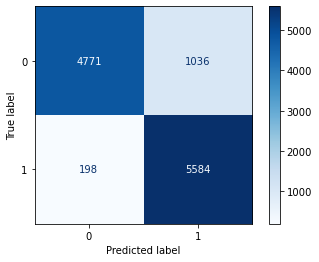

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm_tunned, display_labels=None)
display.plot(cmap=plt.cm.Blues)

In [60]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss
# calculate the precision of the model
precision_tunned = precision_score(y_test, y_pred_tunned, average='macro')
# calculate the F1 score of the model
f1_tunned = f1_score(y_test, y_pred_tunned, average='macro')
# calculate the ROC curve and AUC of the model
y_prob_tunned = xgb_tunned.predict_proba(X_test)
fpr_tunned, tpr_tunned, thresholds_tunned = roc_curve(y_test, y_prob_tunned[:, 1],pos_label=1)
roc_auc_tunned = auc(fpr_tunned, tpr_tunned)
# calculate the log loss of the model
logloss_tunned = log_loss(y_test, y_prob_tunned)
# Calculate the recall score
recall_tunned = recall_score(y_test, y_pred_tunned)
# Calculate the precision score
precision_tunned = precision_score(y_test, y_pred_tunned)

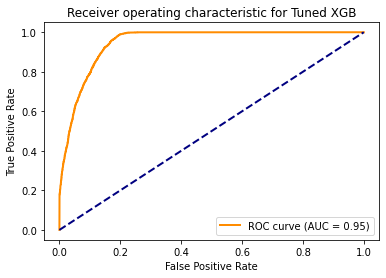

In [61]:
# plot the ROC curve
plt.plot(fpr_tunned, tpr_tunned, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_tunned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Tuned XGB')
plt.legend(loc="lower right")
plt.show()

In [62]:
print("Tuned XGB F1 Score: ",f1_tunned)
print("Tuned XGB AUC: ", roc_auc_tunned)
print("Tuned XGB Log Loss: ", logloss_tunned)
print("Tuned XGB Recall: ", recall_tunned)
print("Tuned XGB Precision: ", precision_tunned)

Tuned XGB F1 Score:  0.892993092571821
Tuned XGB AUC:  0.947707093449937
Tuned XGB Log Loss:  0.25964961756723814
Tuned XGB Recall:  0.965755793842961
Tuned XGB Precision:  0.8435045317220544


In [63]:
from sklearn.metrics import classification_report
print("               Tuned XGB classification report")
print(classification_report(y_test, y_pred_tunned))

               Tuned XGB classification report
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      5807
           1       0.84      0.97      0.90      5782

    accuracy                           0.89     11589
   macro avg       0.90      0.89      0.89     11589
weighted avg       0.90      0.89      0.89     11589

